In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
CURR_DIR = os.getcwd()
data_files = glob.glob(CURR_DIR + "/**/*.csv")
# data_files

## project_doc.csv DATA ANALYSIS

In [4]:
data0 = pd.read_csv(data_files[0])
data0.head(5)

,hour,min,sec,ra,deg,arcmin,arcsec,dec,f100,f60,ratio,Temp,planck,Mass
0,4,1,23.37,60.347375,-74,6,26.2,-74.107278,5.2847,0.1974,0.037353,16.434228,6.251730e-17,3.336790e+25
1,4,1,20.51,60.335458,-74,5,9.3,-74.085917,5.2828,0.1932,0.036572,16.374949,6.056620e-17,3.443040e+25
2,4,1,16.42,60.318417,-74,3,23.0,-74.056389,5.3288,0.2264,0.042486,16.804645,7.583060e-17,2.773920e+25
3,4,1,14.10,60.308750,-74,1,59.1,-74.033083,5.4399,0.2474,0.045479,17.007292,8.397870e-17,2.557000e+25
4,4,1,11.32,60.297167,-74,0,33.7,-74.009361,5.5568,0.2381,0.042848,16.829660,7.680220e-17,2.856010e+25


## SCATTER PLOT

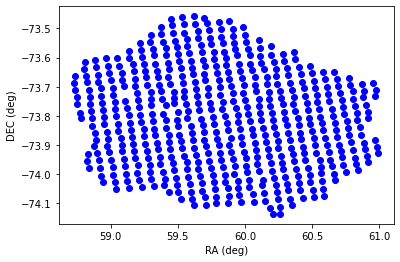

In [5]:
plt.scatter(data0['ra'], data0['dec'], color='b')
plt.xlabel("RA (deg)"), plt.ylabel("DEC (deg)")
plt.show()

## BEST FIT FOR FLUXES AT 60 $\mu m$ AND 100 $\mu m$

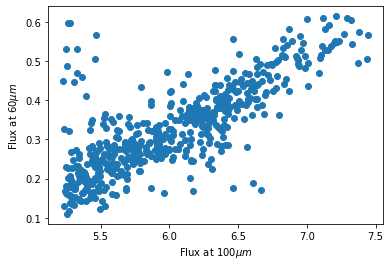

In [6]:
plt.scatter(data0.f100, data0.f60)
plt.xlabel("Flux at 100$\mu m$"), plt.ylabel("Flux at 60$\mu m$")
plt.show()

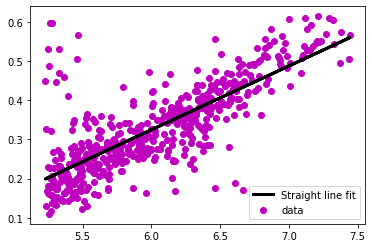

In [7]:
coeff = np.polyfit(data0['f100'], data0['f60'], deg=1)
p = np.poly1d(coeff)
y = p(data0['f100'])
plt.plot(data0['f100'], y, label='Straight line fit', lw = 3, color='black')
plt.scatter(data0.f100, data0.f60, color='m', label='data')
plt.legend()

## CONTOUR PLOT 

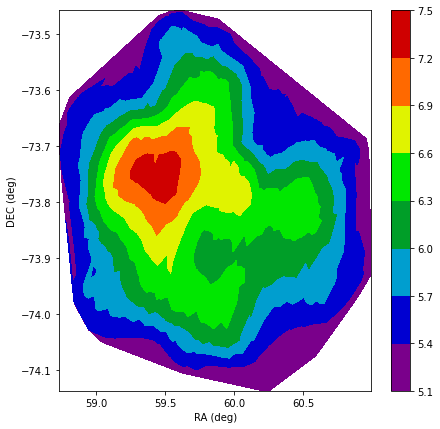

In [8]:
plt.figure(figsize=(7,7))
def Tricontour(X, Y, Data):
    plt.tricontourf(X, Y, Data, cmap='nipy_spectral', levels=7) #contour only plots boundary, contourf plots color-filled contour
    plt.colorbar()
    plt.xlabel('RA (deg)'), plt.ylabel('DEC (deg)')
Tricontour(data0.ra, data0.dec, data0.f100)

## HXEXBIN PLOT

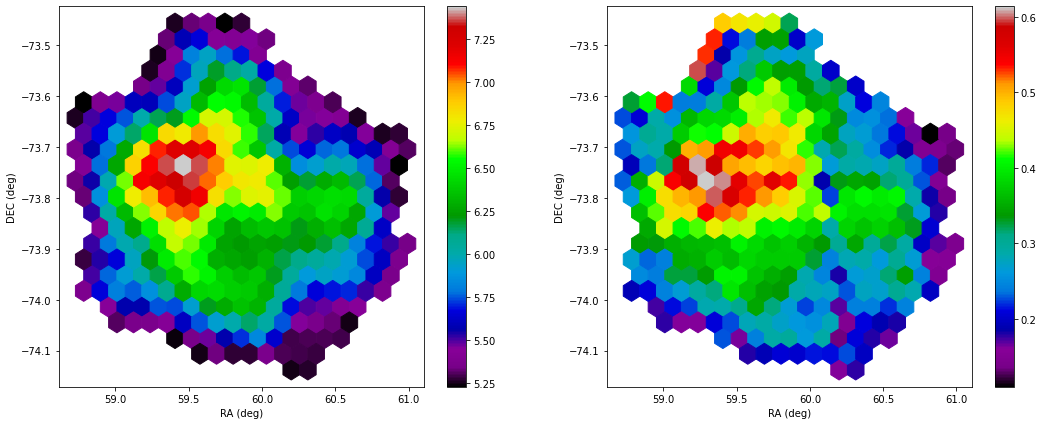

In [9]:
def HexBin(X, Y, Data):
    plt.hexbin(X, Y, Data, gridsize=20, cmap='nipy_spectral')
    plt.colorbar()
    plt.xlabel('RA (deg)'),plt.ylabel('DEC (deg)')

    
plt.figure(figsize=(18,7))
plt.subplot(121)
HexBin(data0.ra, data0.dec, data0.f100)
plt.subplot(122)
HexBin(data0.ra, data0.dec, data0.f60)
plt.show()

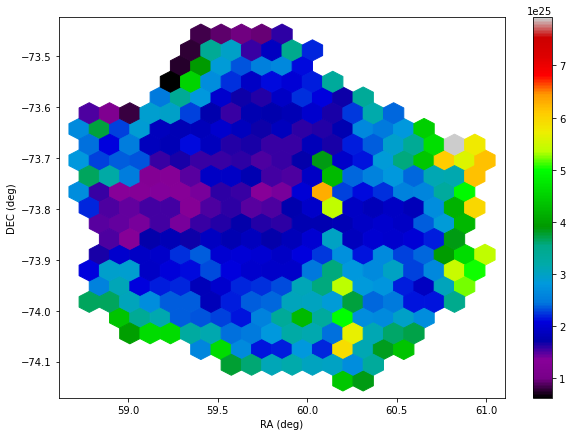

In [10]:
plt.figure(figsize=(10,7))
HexBin(data0.ra, data0.dec, data0.Mass)
plt.show()

## SPECTRAL EMISSIVITY

In [42]:
beta_range = np.arange(0,3.1, 0.1)
def Emissivity(F1, F2, T):
    Temp = []
    Beta = []
    for i in beta_range:
        t = -96/(np.log(F1/F2)+0.6**(3+i))
        Temp.append(t)
        Beta.append(i)
    Tavg = [np.mean(Temp[i]) for i in range(len(Temp))]
    Y_err = np.std(Tavg)/np.sqrt(len(Tavg))
    return Temp, Beta, Tavg, Y_err
    

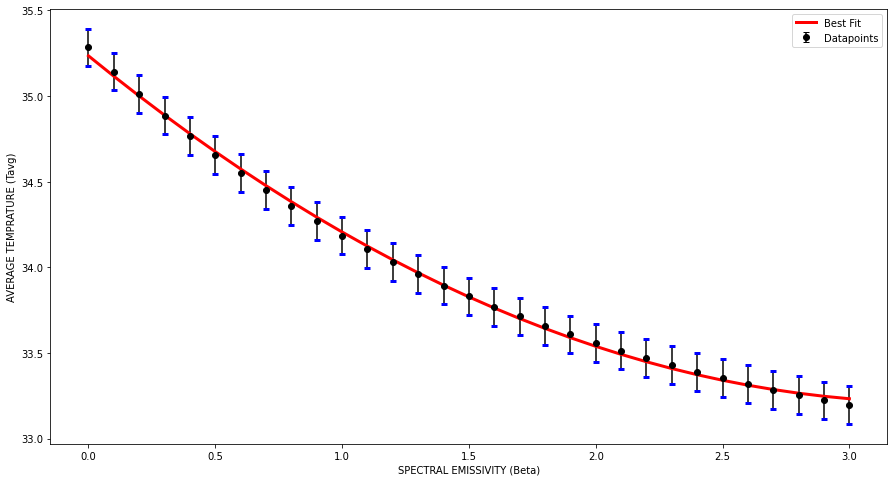

In [92]:
T, Beta, Tavg, Y_err = Emissivity(data0.f60, data0.f100, data0.Temp)

p = np.poly1d(np.polyfit(Beta, Tavg, deg=2)) #polynomial
y = p(Beta)
plt.figure(figsize=(15,8))
_, caps, _ = plt.errorbar(Beta, Tavg, Y_err, fmt='ok', capsize=3, label='Datapoints')

plt.plot(Beta, y, label='Best Fit', lw=3, color='r')
plt.xlabel('SPECTRAL EMISSIVITY (Beta)'), plt.ylabel('AVERAGE TEMPRATURE (Tavg)')
plt.legend()
for i in caps:
    i.set_color('b')
    i.set_markeredgewidth(3)

Text(0.5, 1.0, ' J2000 Coordinate ')

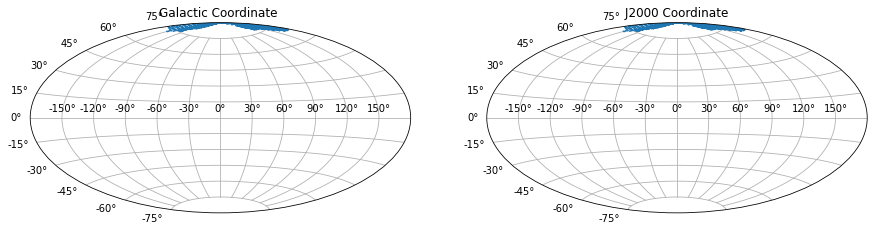

In [130]:
plt.figure(figsize=(15,25))
plt.subplot(121, projection='aitoff')
plt.plot(data0.ra, data0.dec)
plt.grid()
plt.title("Galactic Coordinate ")

plt.subplot(122, projection='aitoff')
plt.plot(data0.ra, data0.dec)
plt.grid()
plt.title(" J2000 Coordinate ")

## GAUSSIAN FIT

In [66]:
def gaussian(x, nbins):
    mu = np.mean(x)
    sigma = np.std(x)
    n, bins, patches = plt.hist(x, num_bins, density=True)
    y = ((1/(np.sqrt(2 * np.pi) * sigma))*np.exp(-0.5 * (1/sigma*(bins - mu))**2))
    plt.plot(bins, y, '--', lw=3)
    plt.tight_layout()

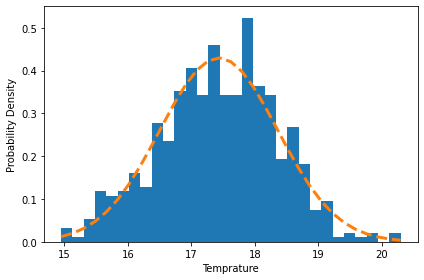

In [67]:
num_bins = 30
plt.xlabel('Temprature')
plt.ylabel('Probability Density')
gaussian(data0.Temp, num_bins)

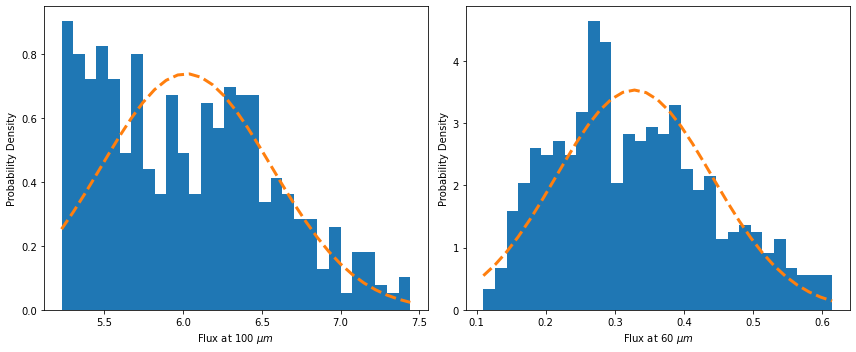

In [231]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.xlabel('Flux at 100 $\mu m$')
plt.ylabel('Probability Density')
gaussian(data0.f100, num_bins)
plt.subplot(122)
plt.xlabel('Flux at 60 $\mu m$')
plt.ylabel('Probability Density')
gaussian(data0.f60, num_bins)

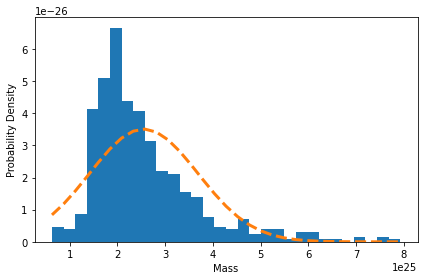

In [224]:
plt.xlabel('Mass')
plt.ylabel('Probability Density')
gaussian(data0.Mass, num_bins)

## helix_doc.csv DATA ANALYSIS

In [94]:
data1 = pd.read_csv(data_files[1])
data1.head(5)

,f140,x,y,ra,dec,f90
0,5.809036,1,500,337.677142,-20.587409,5.427803
1,5.809036,2,500,337.676074,-20.587410,5.427803
2,5.598997,3,500,337.675005,-20.587412,5.314240
3,5.598997,4,500,337.673937,-20.587414,5.314240
4,5.085362,5,500,337.672869,-20.587415,5.032727


## ADDING RATIO, TEMP, PLANCK AND MASS TO THE DATAFRAME

In [95]:
ratio = data1.f90/data1.f140
data1["ratio"] = ratio #new column 'ratio' appended
# data1
Temp = -57/(np.log(data1.ratio*0.64**5))
data1["Temp"] = Temp  #new column 'Temp' appended

In [96]:
c = 3.0E+8 
h = 6.62E-34
kb = 1.38E-23
lam = 1.4E-4
a = np.exp(h*c/(lam*kb*data1['Temp']))
b = 1/(a-1)
planck = h*c*b/lam**3
data1['planck'] = planck

In [97]:
su = data1.f140*5.288*10**-29
D = 200*3.0857*10**16  #here distance is 200 pc
Mass = 0.4*su*D**2/data1.planck
data1["Mass"]=Mass
data1

,f140,x,y,ra,dec,f90,ratio,Temp,planck,Mass
0,5.809036,1,500,337.677142,-20.587409,5.427803,0.934372,24.789984,1.163211e-15,4.023133e+24
1,5.809036,2,500,337.676074,-20.587410,5.427803,0.934372,24.789984,1.163211e-15,4.023133e+24
2,5.598997,3,500,337.675005,-20.587412,5.314240,0.949141,24.960227,1.197131e-15,3.767796e+24
3,5.598997,4,500,337.673937,-20.587414,5.314240,0.949141,24.960227,1.197131e-15,3.767796e+24
4,5.085362,5,500,337.672869,-20.587415,5.032727,0.989650,25.425547,1.292521e-15,3.169590e+24
...,...,...,...,...,...,...,...,...,...,...
249995,6.832092,496,1,337.147510,-21.086407,4.154734,0.608120,20.888165,5.315191e-16,1.035509e+25
249996,6.057034,497,1,337.146438,-21.086405,3.950667,0.652245,21.438475,6.036849e-16,8.082924e+24
249997,6.057034,498,1,337.145367,-21.086403,3.950667,0.652245,21.438475,6.036849e-16,8.082924e+24
249998,6.057034,499,1,337.144295,-21.086402,3.950667,0.652245,21.438475,6.036849e-16,8.082924e+24


In [112]:
## Same data after adding all columns is exported to helix_final.csv
# data2 = pd.read_csv(data_files[2])
# data2.head(5)

## DATA VISUALIZATION

Text(0.5, 1.0, 'Mass')

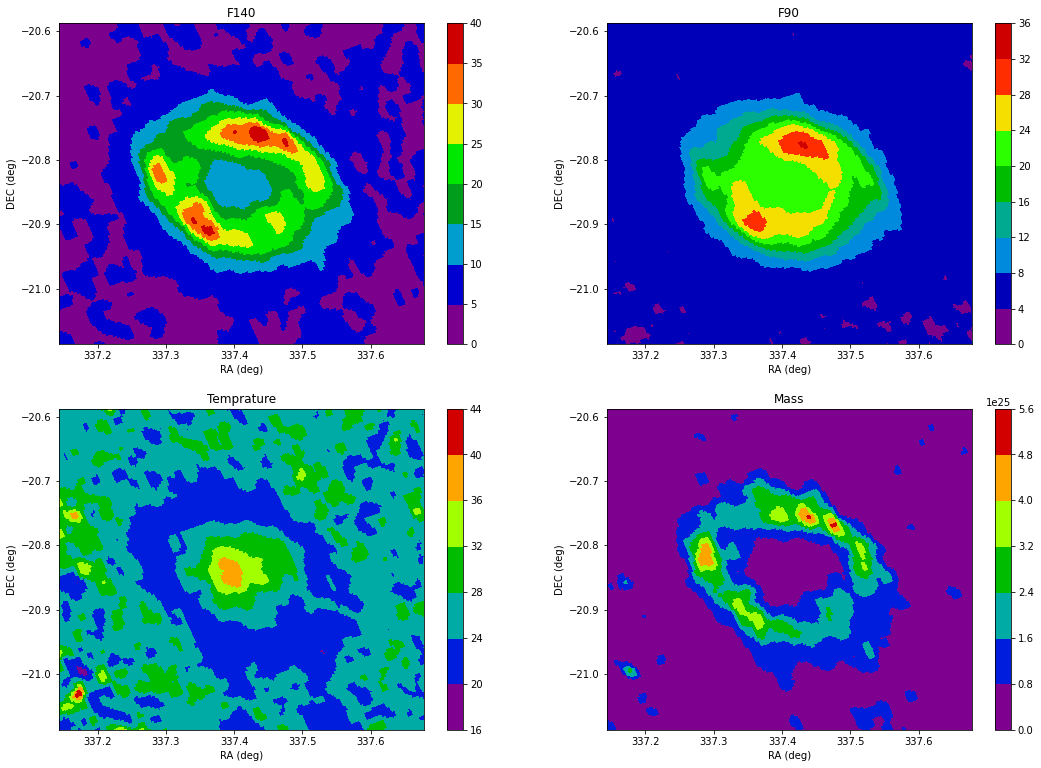

In [59]:
plt.figure(figsize=(18,13))
plt.subplot(221)
Tricontour(data1.ra, data1.dec, data1.f140)
plt.title('F140')
plt.subplot(222)
Tricontour(data1.ra, data1.dec, data1.f90)
plt.title('F90')

plt.subplot(223)
Tricontour(data1.ra, data1.dec, data1.Temp)
plt.title('Temprature')
plt.subplot(224)
Tricontour(data1.ra, data1.dec, data1.Mass)
plt.title('Mass')

Text(0.5, 1.0, 'Mass')

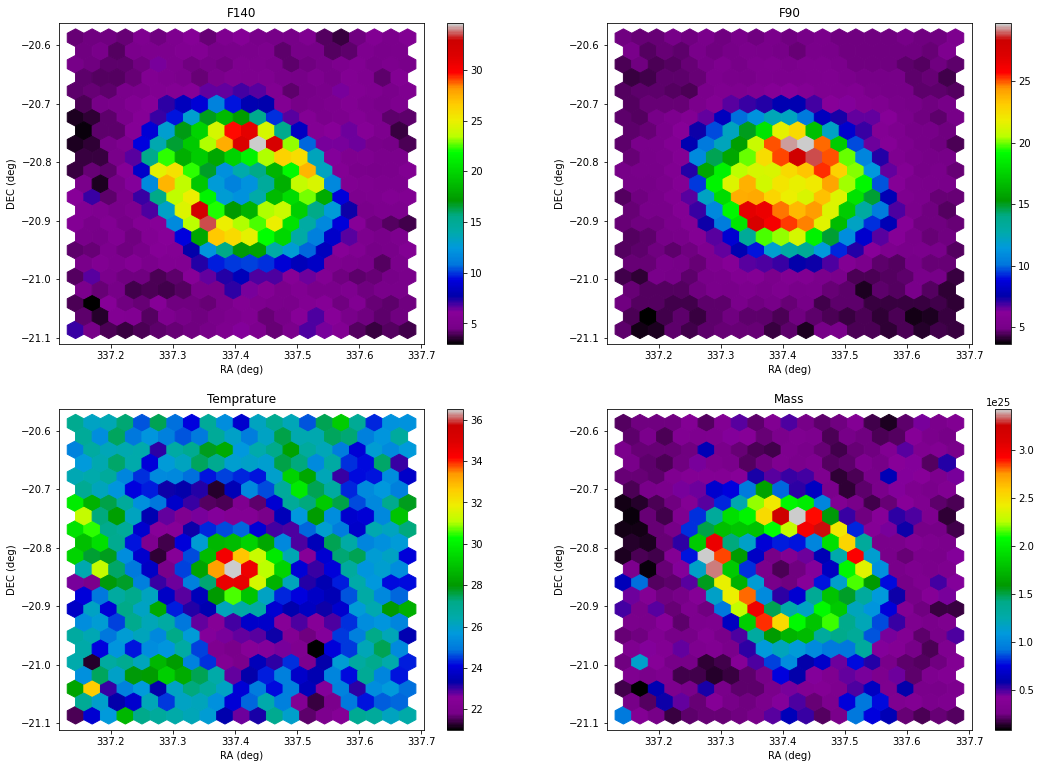

In [62]:
plt.figure(figsize=(18,13))
plt.subplot(221)
HexBin(data1.ra, data1.dec, data1.f140)
plt.title('F140')
plt.subplot(222)
HexBin(data1.ra, data1.dec, data1.f90)
plt.title('F90')

plt.subplot(223)
HexBin(data1.ra, data1.dec, data1.Temp)
plt.title('Temprature')
plt.subplot(224)
HexBin(data1.ra, data1.dec, data1.Mass)
plt.title('Mass')


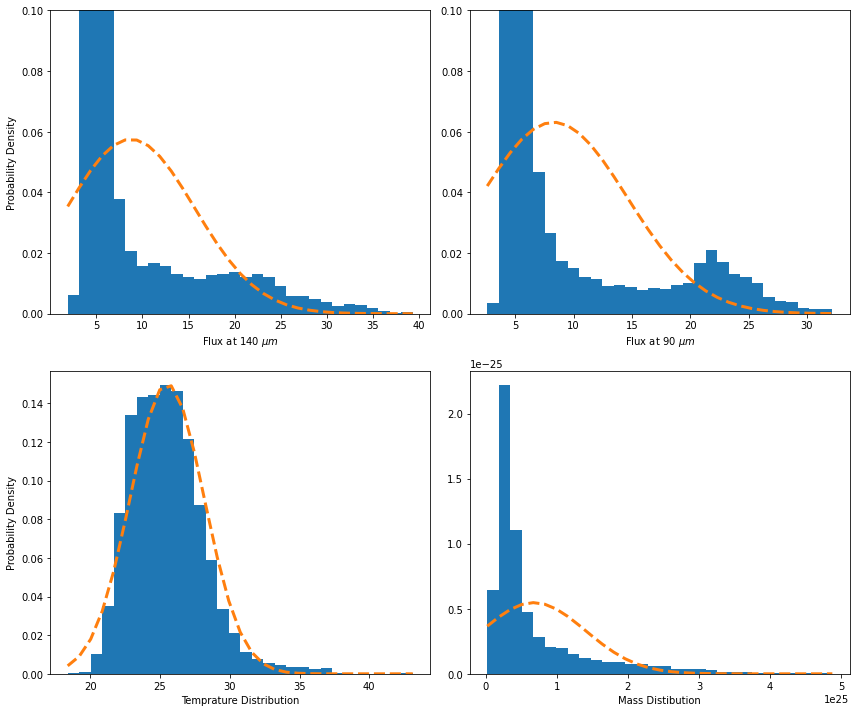

In [97]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.xlabel('Flux at 140 $\mu m$'), plt.ylabel('Probability Density')
plt.ylim(0,0.1)
gaussian(data1.f140, num_bins)

plt.subplot(222)
plt.xlabel('Flux at 90 $\mu m$')
gaussian(data1.f90, num_bins)
plt.ylim(0,0.1)

plt.subplot(223)
plt.xlabel('Temprature Distribution'), plt.ylabel('Probability Density')
gaussian(data1.Temp, num_bins)

plt.subplot(224)
plt.xlabel('Mass Distibution')
gaussian(data1.Mass, num_bins)

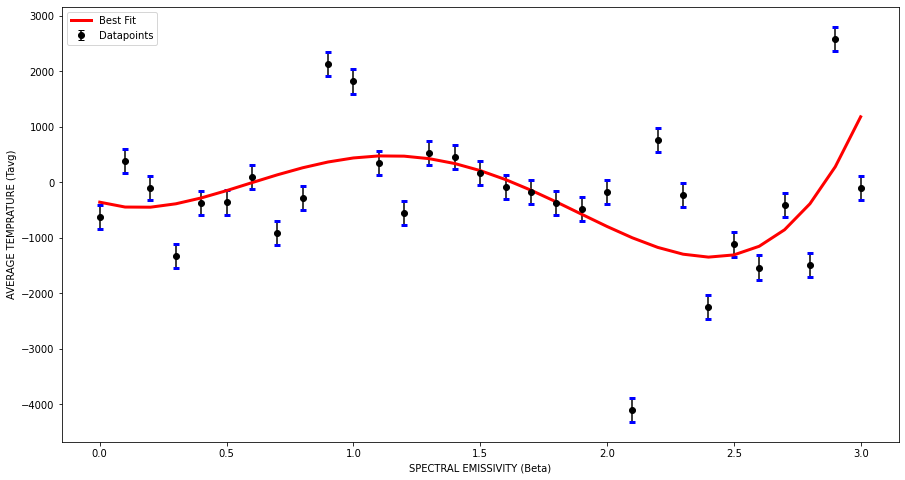

In [111]:
T, Beta, Tavg, Y_err = Emissivity(data1.f90, data1.f140, data1.Temp)

p = np.poly1d(np.polyfit(Beta, Tavg, deg=4)) #polynomial
y = p(Beta)
plt.figure(figsize=(15,8))
_, caps, _ = plt.errorbar(Beta, Tavg, Y_err, fmt='ok', capsize=3, label='Datapoints')

plt.plot(Beta, y, label='Best Fit', lw=3, color='r')
plt.xlabel('SPECTRAL EMISSIVITY (Beta)'), plt.ylabel('AVERAGE TEMPRATURE (Tavg)')
plt.legend()
for i in caps:
    i.set_color('b')
    i.set_markeredgewidth(3)